In [1]:
# !wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6DA924B4F0>


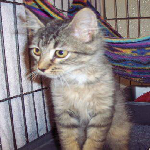

In [49]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
path_train = './data/train'
path_val = './data/validation'

img = load_img(path_train+"/cats/cat.2.jpg", target_size=(150, 150))
print(img)
display(img)
# imgArray = np.array(img)


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input


# train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
# #                                rotation_range=30,
# #                                width_shift_range=10.0,
# #                                height_shift_range=10.0,
# #                                shear_range=10,
# #                                zoom_range=0.1,
# #                                vertical_flip=True,
#                               )

# train_ds = train_gen.flow_from_directory(path_train, 
#                                          target_size=(150,150), 
#                                          batch_size=32)
# print("Infered class_indices from folders:", train_ds.class_indices)
# print()


# val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #no augmentation, we want realistic results

# val_ds = val_gen.flow_from_directory(path_val, 
#                                      target_size=(150,150), 
#                                      batch_size=32,
#                                      shuffle=True)

# base_model = Xception(weights='imagenet', 
#                       include_top=False, #don't include the dense layers
#                       input_shape=(150,150,3))

# base_model.trainable = False #freeze convolutional layers

# # create a covolutional layer
# inputs = keras.Input(shape=(150,150,3))
# base = base_model(inputs, training=False)
layer_conv2D=tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        input_shape=(150,150,3) ,
#         strides=(1, 1),
#         padding="valid",
#         data_format=None,
#         dilation_rate=(1, 1),
#         groups=1,
        activation='relu',
#         use_bias=True,
#         kernel_initializer="glorot_uniform",
#         bias_initializer="zeros",
#         kernel_regularizer=None,
#         bias_regularizer=None,
#         activity_regularizer=None,
#         kernel_constraint=None,
#         bias_constraint=None
    )
print("Conv2D shape=",layer_conv2D(inputs).shape)

layer_max_pool_2d = tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
#     strides=None, 
#     padding="valid", 
#     data_format=None, 
#     **kwargs
)
print("max_pool_2d shape=",layer_max_pool_2d(layer_conv2D(inputs)).shape)

layer_flatten = tf.keras.layers.Flatten(
#         data_format=None,
#         **kwargs
    )

def prepare_model():
    model = tf.keras.Sequential()
    model.add(layer_conv2D)
    model.add(layer_max_pool_2d)
    model.add(layer_flatten)
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    print("Model shape: ",model.output_shape)

    # Optimizer
    

    # loss = keras.losses.BinaryCrossentropy(from_logits=False)

    # model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    # history = model.fit(train_ds, epochs=1, validation_data=val_ds)
    # history.history
    return model



Conv2D shape= (None, 148, 148, 32)
max_pool_2d shape= (None, 74, 74, 32)


In [7]:
# Q1

optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)

losses = {
    'MeanSquaredError': keras.losses.MeanSquaredError(),
    'CategoricalCrossentropy': keras.losses.CategoricalCrossentropy(),
    'BinaryCrossentropy': keras.losses.BinaryCrossentropy(from_logits=False),    
}

scores = {}

for k,loss in losses.items():
    print("Processing loss:", k)
    model = prepare_model()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(train_ds, epochs=1, validation_data=val_ds)
    scores[k] = history.history

scores


Processing loss: MeanSquaredError
Model shape:  (None, 1)
625/625 [==============================] - 191s 305ms/step - loss: 0.2502 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Processing loss: BinaryCrossentropy
Model shape:  (None, 1)
625/625 [==============================] - 184s 294ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


{'MeanSquaredError': {'loss': [0.25015008449554443],
  'accuracy': [0.5],
  'val_loss': [0.2500450015068054],
  'val_accuracy': [0.5]},
 'BinaryCrossentropy': {'loss': [0.6933426260948181],
  'accuracy': [0.5],
  'val_loss': [0.693176805973053],
  'val_accuracy': [0.5]}}

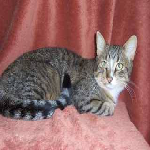

(1, 150, 150, 3)
Model shape:  (None, 1)


array([[0.47804853]], dtype=float32)

In [53]:
path_cat = 'data/validation/cats/cat.10004.jpg'
path_dog = 'data/validation/dogs/dog.10008.jpg'

img = load_img(path_cat, target_size=(150,150))
display(img)

x = np.array(img)
X = np.array([x])
print(X.shape)

X = preprocess_input(X)
model = prepare_model()
model.predict(X)


In [54]:
# Q2

def build_model(model):
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False),    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

model = build_model(prepare_model())

# history = model.fit(train_ds, epochs=1, validation_data=val_ds)
model.summary()

Model shape:  (None, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                11214912  
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


/home/cristiandugacicu/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [55]:
# Q3

train_gen1 = ImageDataGenerator(rescale=1./255)
train_ds1 = train_gen1.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         class_mode='binary',
                                         batch_size=20)
print("Infered class_indices from folders:", train_ds1.class_indices)
print()


val_gen1 = ImageDataGenerator(rescale=1./255)
val_ds1 = val_gen1.flow_from_directory(path_val, 
                                     target_size=(150,150), 
                                     class_mode='binary',
                                     batch_size=20,
                                     shuffle=True #ASK!
                                      )

history1 = model.fit(
    train_ds1,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds1,
    validation_steps=50
)
history1.history

Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 18s 172ms/step - loss: 0.6922 - accuracy: 0.5325 - val_loss: 0.6888 - val_accuracy: 0.5360
Epoch 2/10
100/100 [==============================] - 17s 171ms/step - loss: 0.6860 - accuracy: 0.5455 - val_loss: 0.6807 - val_accuracy: 0.5750
Epoch 3/10
100/100 [==============================] - 19s 194ms/step - loss: 0.6815 - accuracy: 0.5655 - val_loss: 0.6738 - val_accuracy: 0.5880
Epoch 4/10
100/100 [==============================] - 18s 185ms/step - loss: 0.6750 - accuracy: 0.5690 - val_loss: 0.6900 - val_accuracy: 0.5510
Epoch 5/10
100/100 [==============================] - 19s 192ms/step - loss: 0.6784 - accuracy: 0.5645 - val_loss: 0.6699 - val_accuracy: 0.5790
Epoch 6/10
100/100 [==============================] - 19s 193ms/step - loss: 0.6558 - accuracy: 0.6020 - val_loss: 0.6566 - val_ac

{'loss': [0.6921753287315369,
  0.6860392689704895,
  0.6815207004547119,
  0.6749994158744812,
  0.6783829927444458,
  0.6557790637016296,
  0.658906102180481,
  0.6580305099487305,
  0.6474573016166687,
  0.6468218564987183],
 'accuracy': [0.5325000286102295,
  0.5454999804496765,
  0.565500020980835,
  0.5690000057220459,
  0.5644999742507935,
  0.6019999980926514,
  0.6014999747276306,
  0.6075000166893005,
  0.6200000047683716,
  0.6230000257492065],
 'val_loss': [0.6888205409049988,
  0.6807036399841309,
  0.6737869381904602,
  0.6899762153625488,
  0.6699116230010986,
  0.6566387414932251,
  0.6454769968986511,
  0.6431070566177368,
  0.637654721736908,
  0.6668415069580078],
 'val_accuracy': [0.5360000133514404,
  0.574999988079071,
  0.5879999995231628,
  0.5509999990463257,
  0.5789999961853027,
  0.6039999723434448,
  0.6100000143051147,
  0.6179999709129333,
  0.6520000100135803,
  0.5889999866485596]}

In [57]:
# Q3
print('median of training accuracy:', np.median(history1.history['accuracy']))
# Q4
print('standard deviation of training loss:', np.std(history1.history['loss']))

median of training accuracy: 0.5852499902248383
standard deviation of training loss: 0.01565702842783322


In [ ]:
train_gen2 = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

train_ds2 = train_gen2.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         class_mode='binary',
                                         batch_size=20)
print("Infered class_indices from folders:", train_ds2.class_indices)
print()


val_gen2 = ImageDataGenerator(rescale=1./255)
val_ds2 = val_gen2.flow_from_directory(path_val, 
                                     target_size=(150,150), 
                                     class_mode='binary',
                                     batch_size=20,
                                     shuffle=True #ASK!
                                      )


history2 = model.fit(
    train_ds2,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds2,
    validation_steps=50
)
history2.history

Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 24s 241ms/step - loss: 0.6610 - accuracy: 0.5910 - val_loss: 0.6626 - val_accuracy: 0.5710
Epoch 2/10
100/100 [==============================] - 26s 256ms/step - loss: 0.6526 - accuracy: 0.6150 - val_loss: 0.6421 - val_accuracy: 0.6080
Epoch 3/10
100/100 [==============================] - 26s 255ms/step - loss: 0.6533 - accuracy: 0.6085 - val_loss: 0.6561 - val_accuracy: 0.6240
Epoch 4/10
100/100 [==============================] - 26s 262ms/step - loss: 0.6459 - accuracy: 0.6205 - val_loss: 0.6339 - val_accuracy: 0.6240
Epoch 5/10
100/100 [==============================] - 26s 258ms/step - loss: 0.6429 - accuracy: 0.6385 - val_loss: 0.6370 - val_accuracy: 0.6290
Epoch 6/10
100/100 [==============================] - 25s 253ms/step - loss: 0.6338 - accuracy: 0.6315 - val_loss: 0.6397 - val_ac

In [46]:
# Q5
print('mean of validation loss:', np.mean(history2.history['val_loss']))
# Q4
val_accuracy_last5 = history2.history['val_accuracy'][-5:]
print('average of last 5 values for validation accuracy:', np.mean(val_accuracy_last5))
print('average of last 5 values for validation accuracy:', np.sum(val_accuracy_last5)/len(val_accuracy_last5))

mean of validation loss: 0.6312525153160096
average of last 5 values for validation accuracy: 0.6435999870300293
average of last 5 values for validation accuracy: 0.6435999870300293
